In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset into the pandas dataframe
df = pd.read_csv("/content/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#To get all the information related to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#To view the summary statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#To check if there are any null values in the dataset. There are no null values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#To check if there are any duplicates in the dataset. There are no duplicates in the dataset
df.duplicated().sum()

0

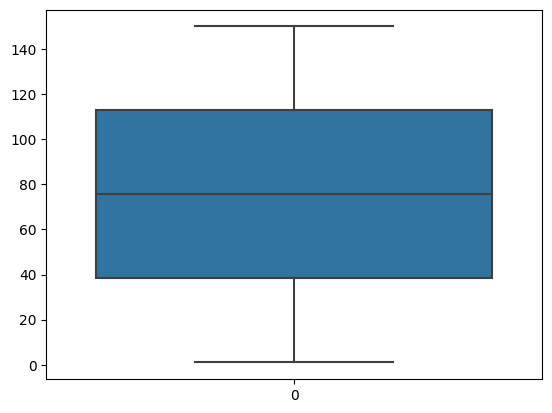

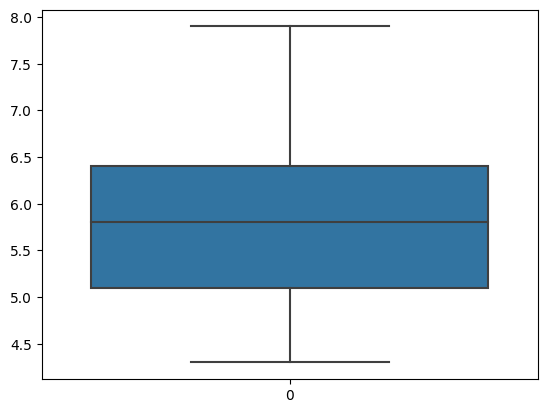

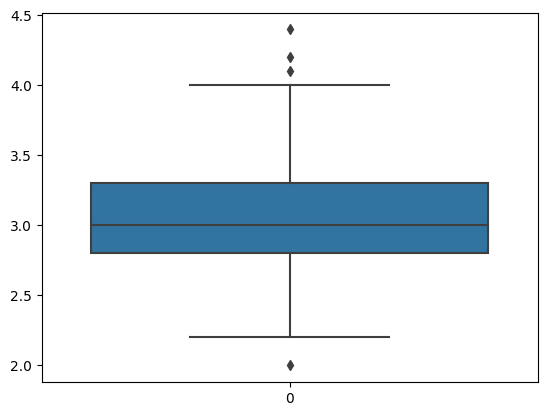

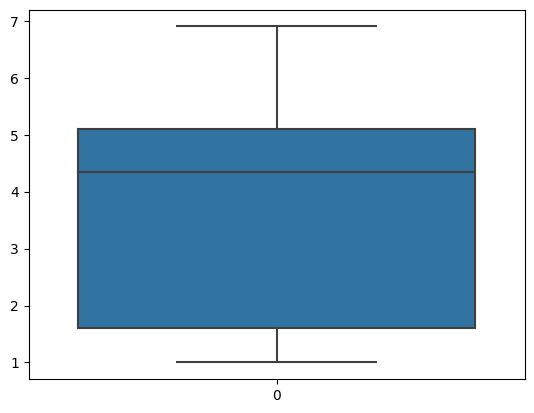

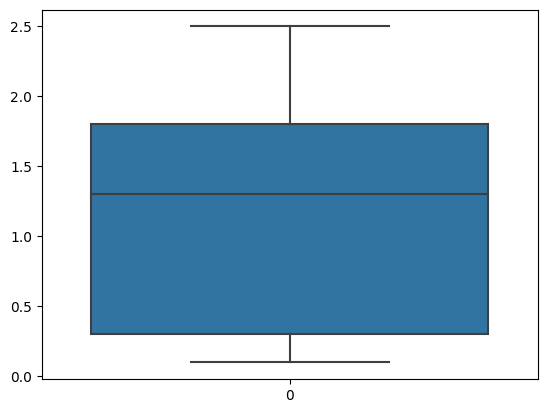

CATEGORICAL


In [ ]:
#We can draw boxplots to identify outliers. The SepalWidthCm has some outliers.
try:
    for i in df:
        sns.boxplot(df[i])
        plt.show()
except:
    Exception
    print('CATEGORICAL')

In [ ]:
# We can remove the outlier using interquartile range
q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)

In [ ]:
IQR = q3 - q1

In [ ]:
IQR = 1.5*IQR

In [ ]:
ul = q3 + IQR

In [ ]:
ll = q1 - IQR

In [ ]:
df = df[(df.SepalWidthCm>ll) & (df.SepalWidthCm<ul)]

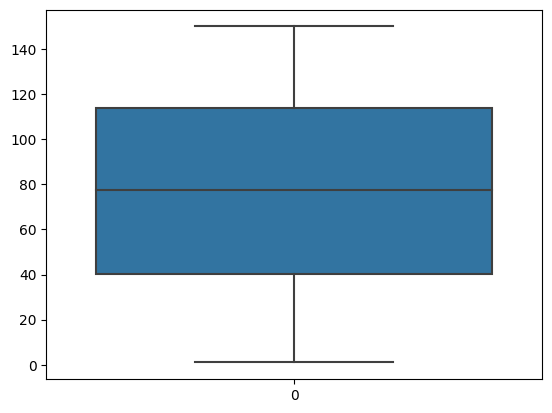

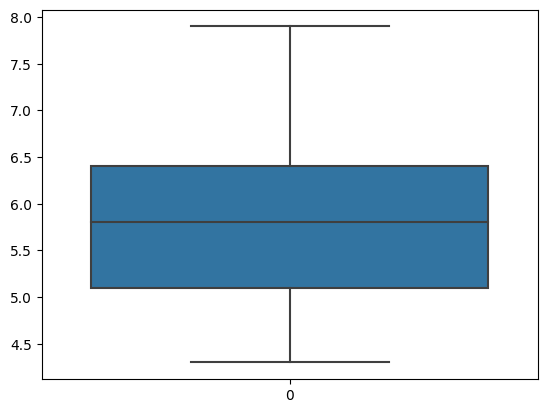

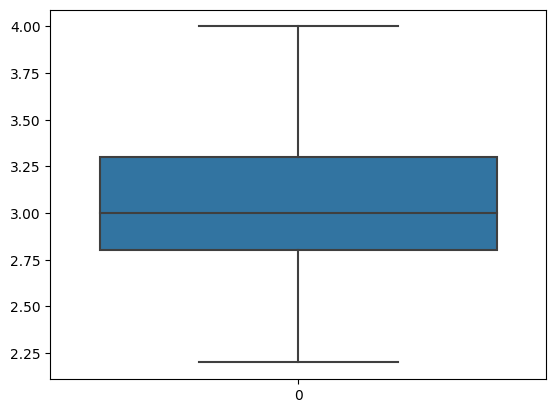

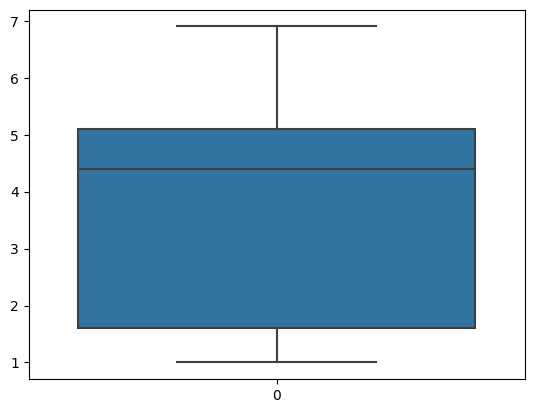

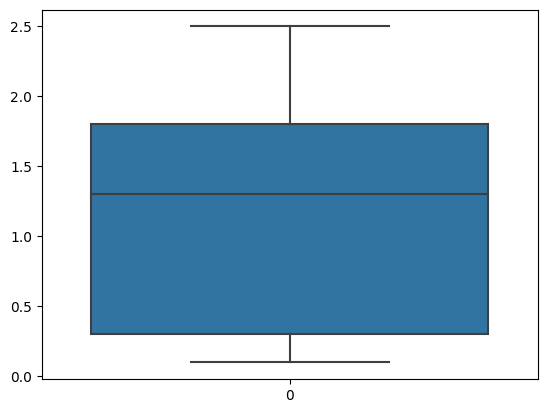

CATEGORICAL


In [ ]:
#As you can see all the outliers has been removed.
try:
    for i in df:
        sns.boxplot(df[i])
        plt.show()
except:
    Exception
    print('CATEGORICAL')

In [ ]:
#We can split the dataset for model creation
X= df[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df["Species"]

In [ ]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 146, dtype: object

In [90]:
# Perform the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [91]:
#I'm using logictic Regression
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

In [92]:
Lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
# Now the model can make prediction
pred = Lr.predict(X)
scores = pd.DataFrame({'Actual':y,'Predictions':pred})

In [94]:
# We can compare the Actual and predictions using table given below
scores.head()

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


In [95]:
y_test_cap = Lr.predict(X_test)

In [96]:
#Model Evaluation
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_cap)*100,'%')

93.33333333333333 %
